<a href="https://colab.research.google.com/github/rahiakela/machine-learning-research-and-practice/blob/main/hands-on-machine-learning-with-scikit-learn-keras-and-tensorflow/5-support-vector-machines/04_svm_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##SVM Exercises

A Support Vector Machine (SVM) is a powerful and versatile Machine Learning
model, capable of performing linear or nonlinear classification, regression, and even
outlier detection.

SVMs are particularly
well suited for classification of complex small- or medium-sized datasets.



##Setup

In [9]:
# Common imports
import numpy as np
import os

from sklearn.svm import LinearSVC
from sklearn.svm import LinearSVR
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from scipy.stats import reciprocal, uniform

from sklearn.metrics import accuracy_score, mean_squared_error

from sklearn import datasets
from sklearn.datasets import make_moons
from sklearn.datasets import fetch_california_housing

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [ ]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

##Exercise-8

train a LinearSVC on a linearly separable dataset. Then train an SVC and a SGDClassifier on the same dataset. 

See if you can get them to produce roughly the same model.

In [ ]:
C = 5
alpha = 1 / (C * len(X))

lin_clf = LinearSVC(loss="hinge", C=C, random_state=42)
svm_clf = SVC(kernel="linear", C=C)
sgd_clf = SGDClassifier(loss="hinge", learning_rate="constant", eta0=0.001, alpha=alpha, max_iter=100000, tol=-np.infty, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lin_clf.fit(X_scaled, y)
svm_clf.fit(X_scaled, y)
sgd_clf.fit(X_scaled, y)

print("LinearSVC:                   ", lin_clf.intercept_, lin_clf.coef_)
print("SVC:                         ", svm_clf.intercept_, svm_clf.coef_)
print("SGDClassifier(alpha={:.5f}):".format(sgd_clf.alpha), sgd_clf.intercept_, sgd_clf.coef_)

LinearSVC:                    [0.28475098] [[1.05364854 1.09903804]]
SVC:                          [0.31896852] [[1.1203284  1.02625193]]
SGDClassifier(alpha=0.00200): [0.319] [[1.12087283 1.02679408]]


Let's plot the decision boundaries of these three models:

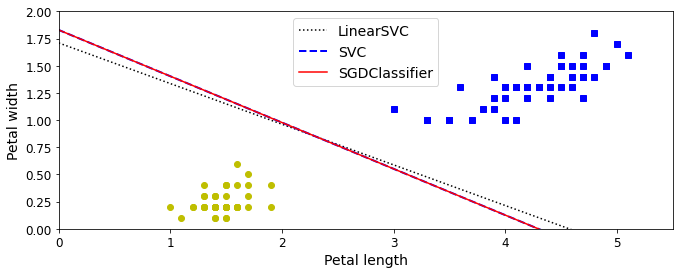

In [ ]:
# Compute the slope and bias of each decision boundary
w1 = -lin_clf.coef_[0, 0]/lin_clf.coef_[0, 1]
b1 = -lin_clf.intercept_[0]/lin_clf.coef_[0, 1]
w2 = -svm_clf.coef_[0, 0]/svm_clf.coef_[0, 1]
b2 = -svm_clf.intercept_[0]/svm_clf.coef_[0, 1]
w3 = -sgd_clf.coef_[0, 0]/sgd_clf.coef_[0, 1]
b3 = -sgd_clf.intercept_[0]/sgd_clf.coef_[0, 1]

# Transform the decision boundary lines back to the original scale
line1 = scaler.inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
line2 = scaler.inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = scaler.inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])

# Plot all three decision boundaries
plt.figure(figsize=(11, 4))
plt.plot(line1[:, 0], line1[:, 1], "k:", label="LinearSVC")
plt.plot(line2[:, 0], line2[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(line3[:, 0], line3[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # label="Iris-Versicolor"
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # label="Iris-Setosa"
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper center", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

##Exercise-9

let's train an SVM classifier on the MNIST dataset. Since SVM classifiers are binary classifiers, you will need to use one-versus-all to classify all 10 digits. You may want to tune the hyperparameters using small validation sets to speed up the process. What accuracy can you reach?

First, let's load the dataset and split it into a training set and a test set. We could use train_test_split() but people usually just take the first 60,000 instances for the training set, and the last 10,000 instances for the test set (this makes it possible to compare your model's performance with others):

In [ ]:
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')

X = mnist["data"]
y = mnist["target"]

X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

Many training algorithms are sensitive to the order of the training instances, so it's generally good practice to shuffle them first:

In [ ]:
np.random.seed(42)
rnd_idx = np.random.permutation(60000)
X_train = X_train[rnd_idx]
y_train = y_train[rnd_idx]

Let's start simple, with a linear SVM classifier. It will automatically use the One-vs-All (also called One-vs-the-Rest, OvR) strategy, so there's nothing special we need to do. Easy!

In [ ]:
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC(random_state=42)

Let's make predictions on the training set and measure the accuracy (we don't want to measure it on the test set yet, since we have not selected and trained the final model yet):

In [ ]:
y_pred = lin_clf.predict(X_train)
accuracy_score(y_train, y_pred)

0.8656166666666667

Wow, 86% accuracy on MNIST is a really bad performance. 

This linear model is certainly too simple for MNIST, but perhaps we just needed to scale the data first:

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.transform(X_test.astype(np.float32))

In [ ]:
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train_scaled, y_train)

In [ ]:
y_pred = lin_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.92025

That's much better (we cut the error rate in two), but still not great at all for MNIST. If we want to use an SVM, we will have to use a kernel. Let's try an `SVC` with an RBF kernel (the default).

**Warning**: if you are using Scikit-Learn ≤ 0.19, the `SVC` class will use the One-vs-One (OvO) strategy by default, so you must explicitly set `decision_function_shape="ovr"` if you want to use the OvR strategy instead (OvR is the default since 0.19).

In [ ]:
svm_clf = SVC(decision_function_shape="ovr", gamma="auto")
svm_clf.fit(X_train_scaled[:10000], y_train[:10000])

SVC(gamma='auto')

In [ ]:
y_pred = svm_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9476

That's promising, we get better performance even though we trained the model on 6 times less data. 

Let's tune the hyperparameters by doing a randomized search with cross validation. We will do this on a small dataset just to speed up the process:

In [ ]:
param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=10, verbose=2, cv=3)
rnd_search_cv.fit(X_train_scaled[:1000], y_train[:1000])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ....C=8.965429868602328, gamma=0.002327392228062871; total time=   0.3s
[CV] END ....C=8.965429868602328, gamma=0.002327392228062871; total time=   0.3s
[CV] END ....C=8.965429868602328, gamma=0.002327392228062871; total time=   0.3s
[CV] END ....C=8.796910002727692, gamma=0.015620693675639861; total time=   0.4s
[CV] END ....C=8.796910002727692, gamma=0.015620693675639861; total time=   0.4s
[CV] END ....C=8.796910002727692, gamma=0.015620693675639861; total time=   0.4s
[CV] END ...C=5.458327528535912, gamma=0.0015847101210439089; total time=   0.3s
[CV] END ...C=5.458327528535912, gamma=0.0015847101210439089; total time=   0.3s
[CV] END ...C=5.458327528535912, gamma=0.0015847101210439089; total time=   0.3s
[CV] END ....C=5.592488919658671, gamma=0.004649617447336332; total time=   0.4s
[CV] END ....C=5.592488919658671, gamma=0.004649617447336332; total time=   0.4s
[CV] END ....C=5.592488919658671, gamma=0.004649

RandomizedSearchCV(cv=3, estimator=SVC(gamma='auto'),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fcc4721a290>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fcc47221550>},
                   verbose=2)

In [ ]:
rnd_search_cv.best_estimator_

SVC(C=10.385527090157503, gamma=0.001003592787878091)

In [ ]:
rnd_search_cv.best_score_

0.8700077322831814

This looks pretty low but remember we only trained the model on 1,000 instances. 

Let's retrain the best estimator on the whole training set (run this at night, it will take hours):

In [ ]:
rnd_search_cv.best_estimator_.fit(X_train_scaled, y_train)

SVC(C=10.385527090157503, gamma=0.001003592787878091)

In [ ]:
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9983166666666666

Ah, this looks good! Let's select this model. Now we can test it on the test set:

In [ ]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.9731

Not too bad, but apparently the model is overfitting slightly. It's tempting to tweak the hyperparameters a bit more (e.g. decreasing `C` and/or `gamma`), but we would run the risk of overfitting the test set. Other people have found that the hyperparameters `C=5` and `gamma=0.005` yield even better performance (over 98% accuracy). By running the randomized search for longer and on a larger part of the training set, you may be able to find this as well.

##Exercise-10

Let's train an SVM regressor on the California housing dataset.

In [3]:
housing = fetch_california_housing()
X = housing["data"]
y = housing["target"]

Split it into a training set and a test set:

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Don't forget to scale the data:

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Let's train a simple `LinearSVR` first:

In [ ]:
lin_svr = LinearSVR(random_state=42)
lin_svr.fit(X_train_scaled, y_train)

Let's see how it performs on the training set:

In [11]:
y_pred = lin_svr.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
mse

0.9641780189948642

Let's look at the RMSE:

In [12]:
np.sqrt(mse)

0.9819256687727764

In this training set, the targets are tens of thousands of dollars. The RMSE gives a rough idea of the kind of error you should expect (with a higher weight for large errors): so with this model we can expect errors somewhere around $10,000. Not great. 

Let's see if we can do better with an RBF Kernel. We will use randomized search with cross validation to find the appropriate hyperparameter values for `C` and `gamma`:

In [13]:
param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(SVR(), param_distributions, n_iter=10, verbose=2, cv=3, random_state=42)
rnd_search_cv.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END .....C=4.745401188473625, gamma=0.07969454818643928; total time=  10.8s
[CV] END .....C=4.745401188473625, gamma=0.07969454818643928; total time=  15.6s
[CV] END .....C=4.745401188473625, gamma=0.07969454818643928; total time=  16.1s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779724; total time=  13.3s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779724; total time=  10.8s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779724; total time=  10.3s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=   9.7s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=   9.8s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=   9.8s
[CV] END ....C=1.5808361216819946, gamma=0.05399484409787431; total time=   9.7s
[CV] END ....C=1.5808361216819946, gamma=0.05399484409787431; total time=   9.6s
[CV] END ....C=1.5808361216819946, gamma=0.05399

RandomizedSearchCV(cv=3, estimator=SVR(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fab88c32f10>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fab9db88e50>},
                   random_state=42, verbose=2)

In [14]:
rnd_search_cv.best_estimator_

SVR(C=4.745401188473625, gamma=0.07969454818643928)

Now let's measure the RMSE on the training set:

In [15]:
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
np.sqrt(mse)

0.5727524770785356

Looks much better than the linear model. Let's select this model and evaluate it on the test set:

In [16]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
np.sqrt(mse)

0.592916838552874